##### <center>**CMPINF 0010 - Group 36 Final Project**</center>
## <center>**What is the Least Depressing Neighborhood in Pittsburgh?**</center>

##### **The Project**
The aim of this project is to quantitatively determine the Pittsburgh neighborhood that is the least depressing to live in. To achieve this, we will be providing a clearly defined metric that we believe may indicate this quality in a neighborhood. The metric will be quantitative in nature and will be sourced from the **Western Pennsylvania Regional Data Center (WPRDC)**.
Our approach is to pick three submetrics from the **WPRDC**, each of which we believe to have significance in our definition of *least depressing*, given below. We will analyze the submetrics individually, as well as considered together, to arrive at a verdict for overall least-depressiveness.

##### **The Metric**
We quantitatively define the "least depressing neighborhood" as the neighborhood that:
<br>
* `contains or has easy access to the largest number of city parks;`
<br>
* `has the lowest lifetime number of police arrests;`
<br>
* and `has the highest rates of community center attendance.`

##### **Coming Up with the Metric**
Our process of arriving at our decided metric was sophisticated. We threw around a handful of spontaneous ideas--most of which were not put to paper and thus unable to be recalled--until we found one we both seemed to be okay with--the "least depressing" metric for determining the best neighborhood.
<br>
Afterwards, we combed through the WPRDC website for available datasets that were also well-structured and thus not a hassle to analyze.
<br>
Out of the approximately nine suitable datasets, namely
* no. of trees
* no. of signalized intersections
* no. of city parks
* community center attendance
* no. of smart trash containers
* no. of playground
* no. of bridges (this one might cut across neighborhoods)
* no. of retaining walls
* no. of water features (fountains, etc.),

we settled on the current three that became our three submetrics that we will be analyzing individually and in tandem to fulfill our main metric.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### **Police Arrests**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

arrests = pd.read_csv('./arrests/arrests.csv')
arrests["INCIDENTNEIGHBORHOOD"].value_counts()

INCIDENTNEIGHBORHOOD
Central Business District      4440
South Side Flats               3497
Carrick                        2352
East Allegheny                 2217
Homewood South                 2090
Homewood North                 1969
East Liberty                   1889
Marshall-Shadeland             1516
Bluff                          1502
Mount Washington               1434
Hazelwood                      1396
Brookline                      1390
Lincoln-Lemington-Belmar       1362
Knoxville                      1336
Sheraden                       1285
Allegheny Center               1244
Beechview                      1201
East Hills                     1194
Brighton Heights               1114
Perry South                    1057
Bloomfield                      984
Shadyside                       971
Allentown                       947
Middle Hill                     932
Larimer                         879
Central North Side              853
Crawford-Roberts                839
North S

In [214]:
import pandas as pd
import matplotli as plt

#### **City Parks**

Parks! This is the first sub-metric. Who doesn't love parks? You can go inside them, look around them, frolick in them, walk your pet or yourself in them, and more. Parks typically are expected to contain plenty of greenery and open, relaxing spaces that fit outdoor recreation like a glove. Human brains are still very much primitive; spending time surrounded by natural greenery is good for us whether we think we like it or not. Therefore, it is an undeniable fact of our ape brains that more parks means more greenery which means more happiness. From this we can dervie with simple inverse correlation that more parks equates to a less depressing place to live. Let us see which neighborhoods are the most equipped with these parks.

I love reading. Let's read the file.

In [7]:
parks = pd.read_csv("city-parks.csv")
parks.head(3)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017


See now, I love reading, but not the things I don't need. Let us filter out the columns that we won't be needing.

In [21]:
parks[["name", "type", "neighborhood"]].head(5)

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore


Much better.

First, let us sort by `neighborhood` so we can easily count how many there are in each. Since parks are places, and a place can't be in two places at the same time, we only need to count the number of unique park names for each `neighborhood` to determine the amount in each. We can ignore the parks' `type` for the moment.

In [235]:
parks[["name", "neighborhood"]].groupby("neighborhood").count()

,name
neighborhood,
Allegheny Center,2
Allentown,2
Arlington,1
Banksville,2
Bedford Dwellings,1
...,...
Upper Lawrenceville,3
West End,2
West Oakland,1


Now, we want to sort this so the winner gets to go on top. The simplest way to do this is to use the `sort_values()` function. Watch out! Don't forget to specify the argument to sort by descending!

In [237]:
parksDF = parks[["name", "neighborhood"]].groupby("neighborhood").count().sort_values(by="name", ascending=False)
parksDF

,name
neighborhood,
East Liberty,12
Central Business District,10
Beechview,8
Point Breeze,7
South Side Slopes,7
...,...
Homewood West,1
Oakwood,1
Middle Hill,1


Now that is really nice, but since the type of park was easily made available for us, it is best we make some use of it. Five types are present, namely `Park`, `Traffic Island/Median`, `Monument/Memorial`, `Open Space`, and `Building Grounds`. Based on the typical size expected of each of these types--all of which are only estimates based on the *feel* I get from Google images--we apply a multiplier to adjust for their (expected) size differences relative to the largest type (`Park`) as well as the expected amount of greenery and nature.

In [242]:
weights = {"Park":1.0,
               "Traffic Island/Median":0.1,
              "Monument/Memorial":0.4,
              "Open Space":0.1,
              "Building Grounds":0.2}

Now, we iterate through each park to note its type and indicate the amount of each present for each neighborhood.

In [243]:
parksDF = parks[["name", "neighborhood"]].groupby("neighborhood").count().sort_values(by="name", ascending=False)

typeSeries = parks[["type", "neighborhood"]].loc[:, "type"]
neighborhoodSeries = parks[["type", "neighborhood"]].loc[:, "neighborhood"]

types = ["Park", "Traffic Island/Median", "Monument/Memorial", "Open Space", "Building Grounds"]

for i in range(len(typeSeries)):
    
    #create column if it doesn't exist
    if typeSeries[i] not in parksDF.columns:
        parksDF[typeSeries[i]] = 0
    
    parksDF.loc[neighborhoodSeries[i], typeSeries[i]] += 1
parksDF

,name,Park,Traffic Island/Median,Building Grounds,Monument/Memorial,Open Space
neighborhood,,,,,,
East Liberty,12,4,8,0,0,0
Central Business District,10,3,5,0,0,2
Beechview,8,6,1,0,1,0
Point Breeze,7,1,6,0,0,0
South Side Slopes,7,6,0,1,0,0
...,...,...,...,...,...,...
Homewood West,1,1,0,0,0,0
Oakwood,1,1,0,0,0,0
Middle Hill,1,1,0,0,0,0


Now we just apply the weights and sum them again.

In [244]:
parksDF["score"] = (parksDF["Park"]*weights["Park"] +
                    parksDF["Traffic Island/Median"]*weights["Traffic Island/Median"] +
                    parksDF["Building Grounds"]*weights["Building Grounds"] +
                    parksDF["Monument/Memorial"]*weights["Monument/Memorial"] +
                    parksDF["Open Space"]*weights["Open Space"])

parksDF = parksDF.sort_values(by="score", ascending=False)
parksDF

,name,Park,Traffic Island/Median,Building Grounds,Monument/Memorial,Open Space,score
neighborhood,,,,,,,
Beechview,8,6,1,0,1,0,6.5
South Side Slopes,7,6,0,1,0,0,6.2
Hazelwood,6,5,0,1,0,0,5.2
Mount Washington,6,5,0,1,0,0,5.2
Troy Hill,5,5,0,0,0,0,5.0
...,...,...,...,...,...,...,...
Upper Hill,1,1,0,0,0,0,1.0
Bedford Dwellings,1,1,0,0,0,0,1.0
Windgap,1,1,0,0,0,0,1.0


<Axes: xlabel='neighborhood'>

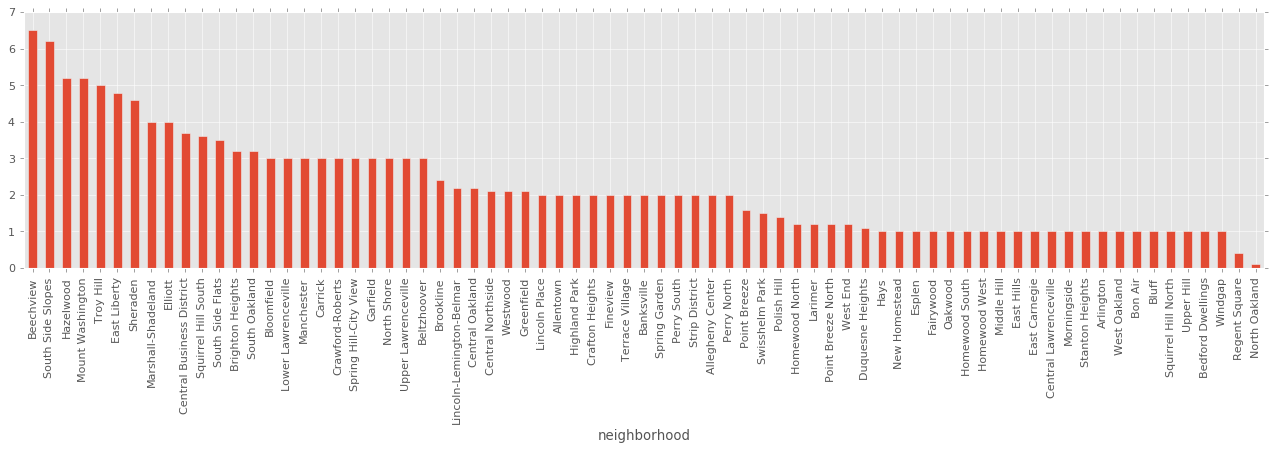

In [245]:
plt.style.use("ggplot")
parksDF["score"].plot.bar(figsize=(20,4))

In terms of having the most city parks, Beechview is clearly the winner. Now, I am no Pittsburgh local. In fact, it's only been three months since I landed in this silly country. Therefore, I don't even remember hearing the name `Beechview` until when I was doing this project. "Sorry, what was that? Beach view? Does Pittsburgh have beaches?" would've been my reaction. Clearly, I know nothing about this particular neighborhood, so I have no qualifying opinion on how good it actually is. Looking at online images though, I don't think it's half bad. Seems like an okay place to live, and looking at a map I do see how it might have the largest amount of city parks, even if their sizes all dwarf in comparison to good old Schenley or Frick. I will say I am slightly surprised, since I was not expecting a neighborhood with the land area of Beechview to have the largest amount of parks. I suppose I underestimated how small parks can get and still be listed on the **WPRDC.**
<br>
South Side Slopes is the runner-up here and might also have a good chance of winning. I seen this neighborhood exactly once from the roads of South Side Flats, so based on that alone I'd say it does look plenty green, though I'm not sure how much of the greenery are located in the parks.

#### **Service Requests**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

# i love roadwork I Love Roadwork I LOVE ROADWORK

In this notebook we are going to examine the frequency of 311 requests per neighborhood in Pittsburgh so that we can later use them in our broader study of least-depressing neighborhoods in Pittsburgh. We're going accomplish this by using Pandas to aggregate the number of requests per neighborhood, and then we're going to divide the number of requests by the number of people in the neighborhood. Then, we're going to normalize the ratio into a zero-to-one scale. Finally we're going to generate a plot to see which neighborhood requires the least service per person.

# Moi quand je télécharge des numéros

In [28]:
raw_reqs = pd.read_csv('./service-requests.csv')
reqs = raw_reqs["neighborhood"].value_counts()
print(reqs)

neighborhood
Brookline                    31289
Carrick                      30172
South Side Flats             28918
South Side Slopes            28601
Squirrel Hill South          28317
Bloomfield                   22380
Central Business District    21298
Mount Washington             20983
Beechview                    18592
Shadyside                    17377
Greenfield                   16697
Hazelwood                    14686
Central Lawrenceville        14366
Brighton Heights             14363
East Liberty                 13808
Squirrel Hill North          13571
Marshall-Shadeland           13335
Sheraden                     13289
Garfield                     12321
Highland Park                12098
Lincoln-Lemington-Belmar     12018
Stanton Heights              11525
Perry North                  11437
Crafton Heights              11401
Central Oakland              11317
Perry South                  11262
Knoxville                    11199
Overbrook                    10653
South O

So, above we see that Mount Oliver Borough has the fewest service calls outright. That looks pretty promising! But perhaps it is just a very small or sparsely populated area. Lets go grab our population data and see what things look like after we correct for neighborhood size.

Note that I will be slightly modifying the population dataset to better fit the neighborhood names in *this* data set, because apparently nobody can spell things consistently. Like, I literally saw mountain spelled "Mountain" and "Mt." and they were right next to eachother. Reader, I am screaming.

In [29]:
pops = pd.read_csv('../neighborhood-populations.csv', index_col="Neighborhood")
pops.keys()
for name, count in reqs.items():
    if name in pops.index:
        reqs[name] /= pops.loc[name, "2020_Total_Population"]

reqs = reqs.sort_values()
print(reqs)

neighborhood
Arlington Heights             0.078922
Mount Oliver Borough          0.218962
Northview Heights             0.465235
Glen Hazel                    0.710167
North Oakland                 0.712468
Bluff                         0.839340
Terrace Village               0.954741
Fairywood                     1.044872
Shadyside                     1.134491
Squirrel Hill North           1.142436
Banksville                    1.307972
Westwood                      1.317227
Bedford Dwellings             1.347763
Friendship                    1.493632
Oakwood                       1.505366
Swisshelm Park                1.690814
West Oakland                  1.709155
East Carnegie                 1.824847
Squirrel Hill South           1.848730
Point Breeze                  1.877337
Central Oakland               1.939503
Highland Park                 1.940337
Crawford-Roberts              2.000000
Brighton Heights              2.021534
Windgap                       2.116815
New Homestea

/tmp/ipykernel_969/3692252984.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.3952384597718748' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  reqs[name] /= pops.loc[name, "2020_Total_Population"]


So, here we can clearly see that in actuality, Arlington Heights beats out the Mount Oliver Borough by a tad. Now, I'd normalize these values, but because we have outliers, it really doesn't make much sense to do so, so instead we will just handle them as-is.

<Axes: xlabel='neighborhood'>

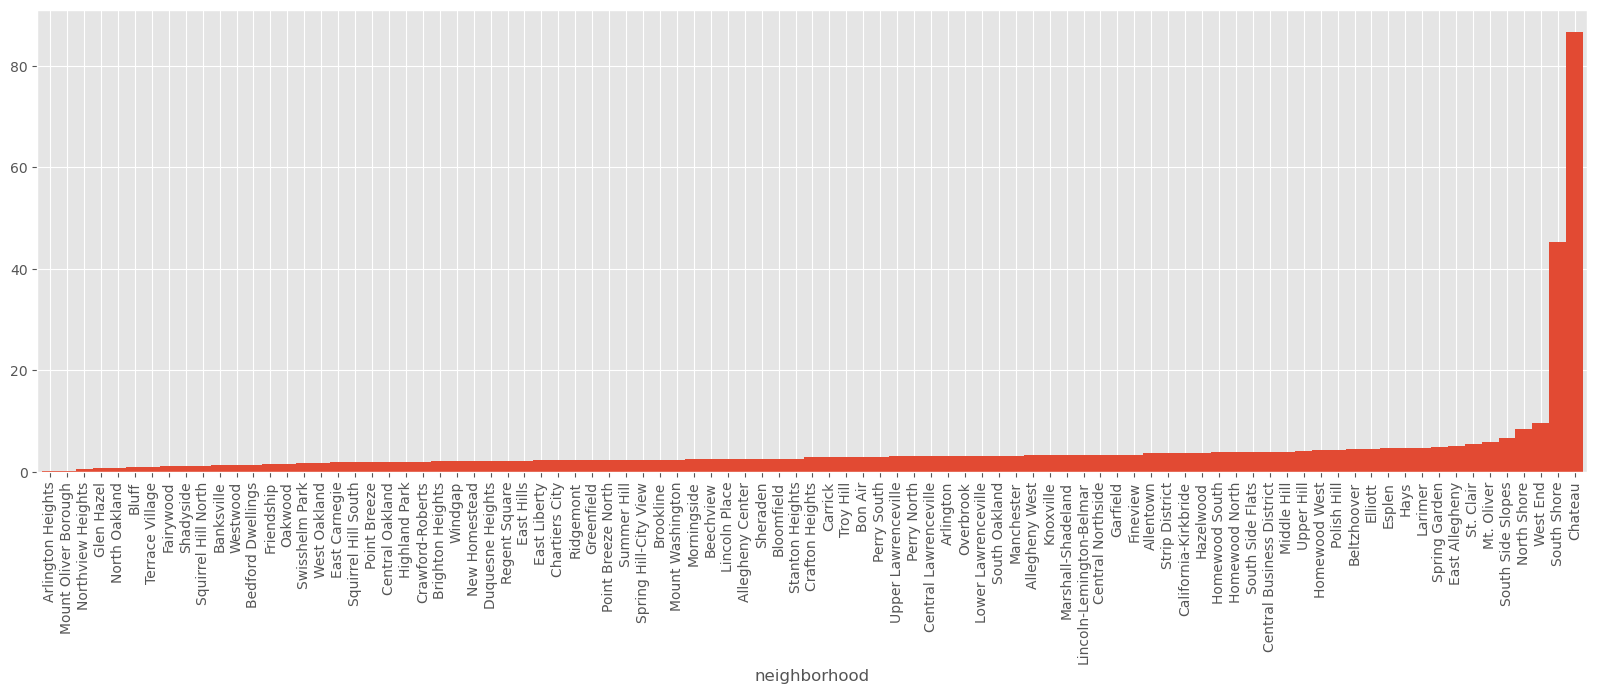

In [45]:
plt.style.use("ggplot")
reqs.plot(kind="bar", width=1, figsize=(20, 6))

#### **Conclusion**

* Combine individual metrics into your final, overarching metric
* Name a neighborhood as “Best” according to your analysis